In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy

sys.path.insert(0, '../python')
sys.path.insert(0, '/usr/lib/python2.7/dist-packages')

import arrayOp
from fileOp import pickle_load
import cv2
import parseData
import copy

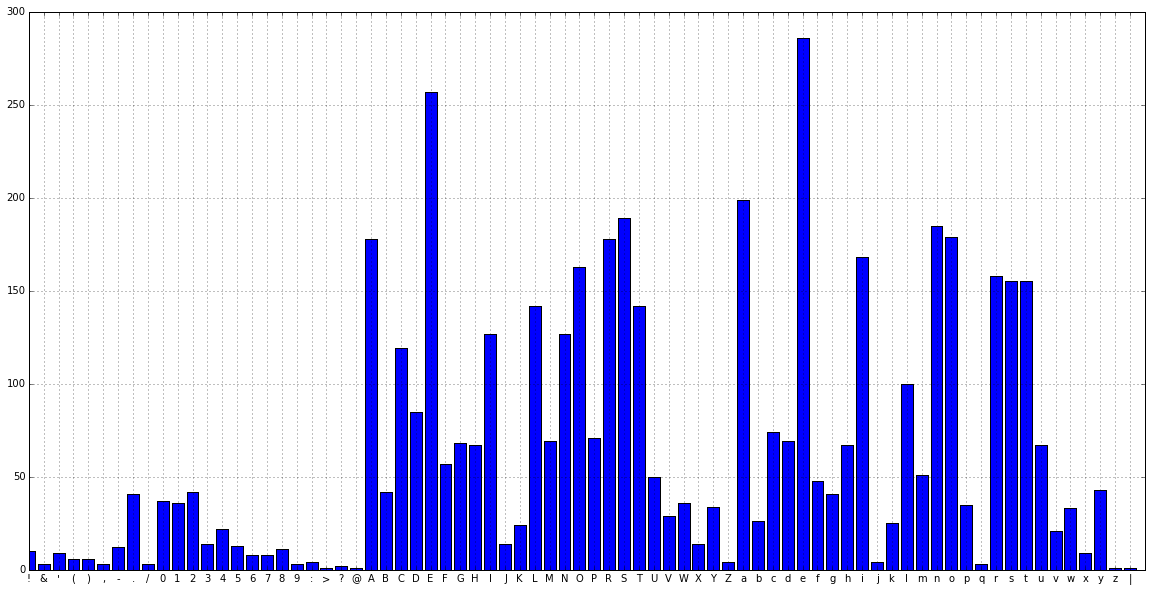

In [2]:
myParser = parseData.parseChar2013()

# generate foreground labels
imdir = '../icdar2013/task21_22/train/image'
bbdir = '../icdar2013/task21_22/train/char_label/'
label = myParser.parseLabel(imdir, bbdir)

d = dict()
for l in label:
    char = l[1]
    for c in char:
        if d.has_key(c):
            d[c] += 1
        else:
            d[c] = 1

d0 = copy.copy(d)
# plot alphabetical prior probability 
k = []
v = []
for key, value in sorted(d.items()): # Note the () after items!
    k.append(key)
    v.append(value)
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(range(len(v)), v, align='center')
plt.xticks(range(len(k)), k)
plt.grid('on')
ax.set_xlim([0, len(v)])
ax.set_ylim()
plt.show()

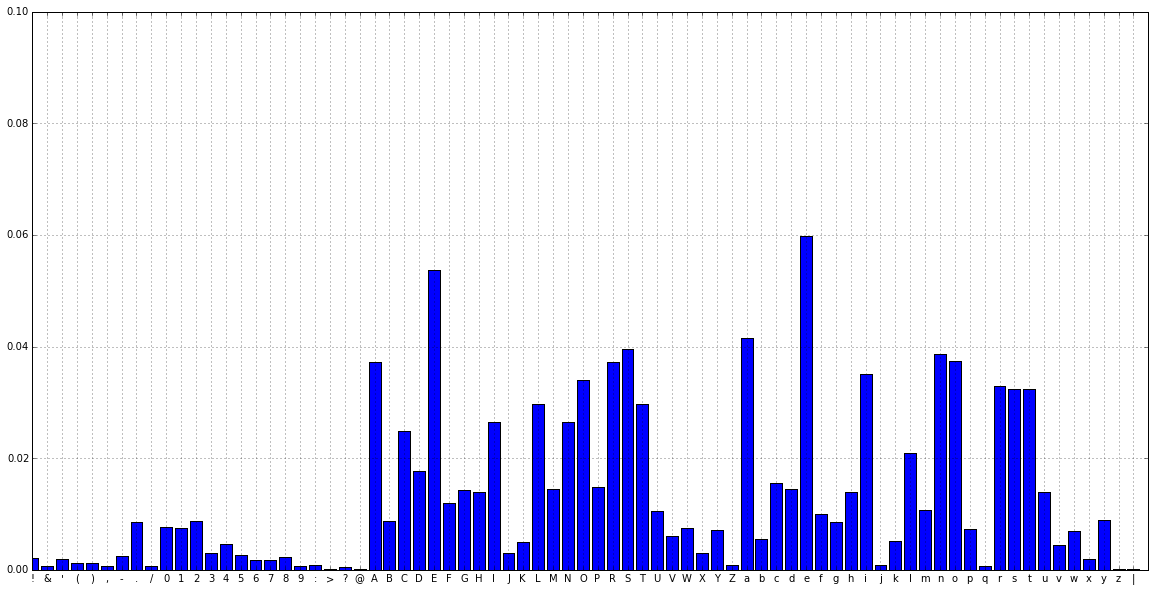

In [99]:
norm_v0 = numpy.asarray(v, dtype = numpy.float32) / numpy.sum(numpy.asarray(v))
norm_factor0 = numpy.sum(numpy.asarray(v))
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(range(len(norm_v0)), norm_v0, align='center')
plt.xticks(range(len(k)), k)
plt.grid('on')
ax.set_xlim([0, len(v)])
ax.set_ylim([0, 0.1])
plt.show()

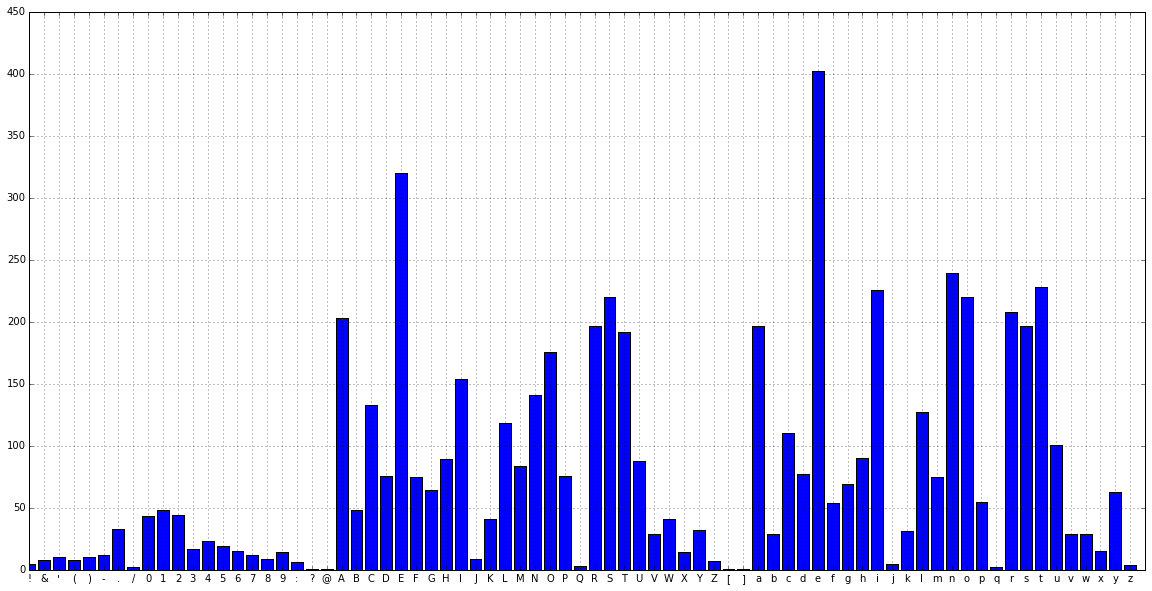

In [100]:
myParser = parseData.parseWord2013()

# generate foreground labels
imdir = '../icdar2013/task21_22/test/image'
bbdir = '../icdar2013/task21_22/test/word_label/'
label = myParser.parseLabel(imdir, bbdir, mode = 'test')

d = dict()
for l in label:
    wordlist = l[1]
    for w in wordlist:
        for c in w:
            if d.has_key(c):
                d[c] += 1
            else:
                d[c] = 1

# plot alphabetical prior probability 
k = []
v = []
for key, value in sorted(d.items()): # Note the () after items!
    k.append(key)
    v.append(value)
d1 = copy.copy(d)
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(range(len(v)), v, align='center')
plt.xticks(range(len(k)), k)
plt.grid('on')
ax.set_xlim([0, len(v)])
ax.set_ylim()
plt.show()

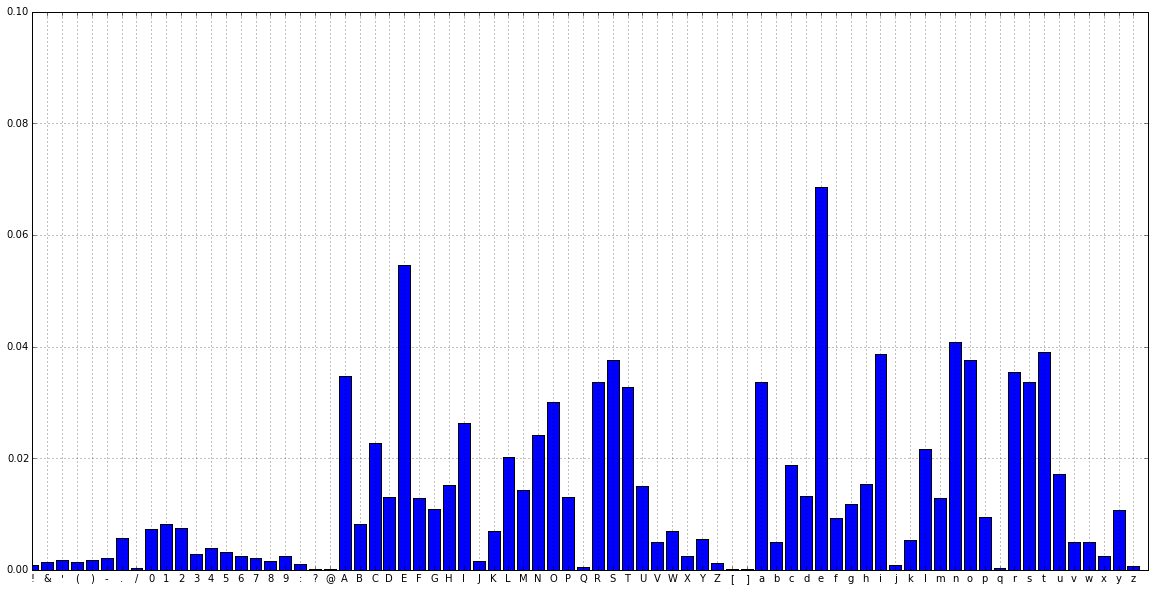

In [101]:
norm_v1 = numpy.asarray(v, dtype = numpy.float32) / numpy.sum(numpy.asarray(v))
norm_factor1 = numpy.sum(numpy.asarray(v))
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(range(len(norm_v1)), norm_v1, align='center')
plt.xticks(range(len(k)), k)
plt.grid('on')
ax.set_xlim([0, len(v)])
ax.set_ylim([0, 0.1])
plt.show()

In [102]:
norm_d0 = copy.copy(d0)
for key, value in sorted(d0.items()): # Note the () after items!
    norm_d0[key] = float(value)/norm_factor0
norm_d1 = copy.copy(d1)
for key, value in sorted(d1.items()): # Note the () after items!
    norm_d1[key] = float(value)/norm_factor1

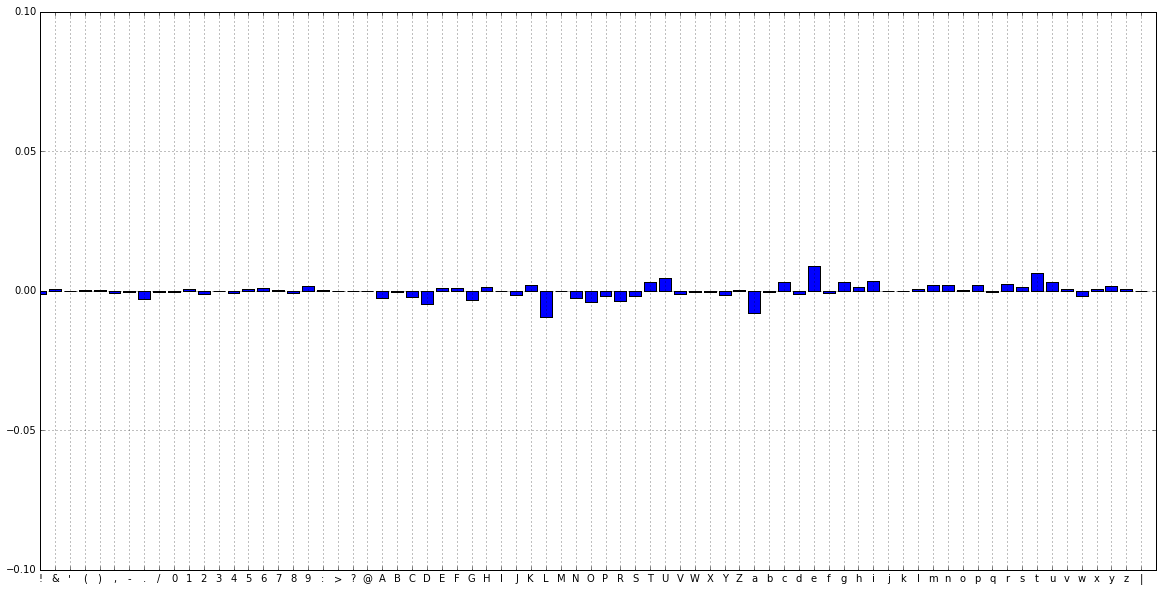

In [104]:
# plot alphabetical prior probability 
k = []
v = []
for key0, value0 in sorted(norm_d0.items()): # Note the () after items!
    k.append(key0)
    if key0 in norm_d1:
        value1 = norm_d1[key0]
    else:
        value1 = 0
    v.append(value1 - value0)

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(range(len(v)), v, align='center')
plt.xticks(range(len(k)), k)
plt.grid('on')
ax.set_xlim([0, len(v)])
ax.set_ylim([-0.1, 0.1])
plt.show()

In [4]:
sum(v)

4784